<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M2_AI2_AlvaradoRuizJoseArmando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FUNDAMENTOS DE ESTADÍSTICA**



ALUMNO: **JOSE ARMANDO ALVARADO RUIZ**




# **Descripción de la tarea**
El objetivo de esta actividad consiste en identificar y analizar el total pagado de un dataset de facturas que tiene una compañía.

El diccionario de datos es el siguiente:

 
* Id: identificador correlativo y secuencial del número de registros de facturas.
* Fecha: fecha en la que se generó la factura.
* Mes: mes en la que se generó la factura.  
* Cliente: tipo de cliente, clasificado de la A a la D.
* Factura pagada: descriptivo de si está pagada o no, en la fecha de generación.
* Importe factura: importe neto sin el IVA.
* Tipo IVA: es el tipo de impuesto aplicado (descriptivo).
* Porcentaje IVA: es el porcentaje aplicado.
* IVA: es el valor numérico del porcentaje correspondiente a la factura.
* Total pagado: es el importe bruto de la factura (el neto más el importe IVA).


### **Importación librerias**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

Carga de Datos y visualización general

In [3]:
url = 'https://raw.githubusercontent.com/md-lorente/data/master/datos_facturas.csv'


df = pd.read_csv(url, sep=';', decimal=',')

Visualización de los primeros 10 registros del dataset.


In [4]:
df.head(30)

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
0,1,01/01/2010,Enero,clienteA,si,100,normal,18,18.0,118.0
1,2,02/01/2010,Enero,clienteB,no,150,normal,18,27.0,177.0
2,3,03/01/2010,Enero,clienteC,si,75,normal,18,13.5,88.5
3,4,04/01/2010,Enero,clienteD,si,200,normal,18,36.0,236.0
4,5,05/01/2010,Enero,clienteA,no,125,normal,18,22.5,147.5
5,6,06/01/2010,Enero,clienteB,si,100,reducido,8,8.0,108.0
6,7,07/01/2010,Enero,clienteC,si,175,reducido,8,14.0,189.0
7,8,08/01/2010,Enero,clienteD,no,200,normal,18,36.0,236.0
8,9,09/01/2010,Enero,clienteA,si,100,normal,18,18.0,118.0
9,10,10/01/2010,Enero,clienteB,si,100,normal,18,18.0,118.0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               45 non-null     int64  
 1   fecha            45 non-null     object 
 2   mes              45 non-null     object 
 3   cliente          45 non-null     object 
 4   factura_pagada   45 non-null     object 
 5   importe_factura  45 non-null     int64  
 6   tipo_IVA         45 non-null     object 
 7   porcentaje_IVA   45 non-null     int64  
 8   IVA              45 non-null     float64
 9   total_pagado     45 non-null     float64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.6+ KB
None


El dataset consta de **45 registros** con **10 variables**.

# **Analisis Variable total_pagado**

Esta variable representa el total facturado de la compra, y no necesariamente al total pagado, ya que existe la variable factura_pagada (cualitativa binaria) en la cual se define si esta pagada o no la factura.

Aclarado esto, la variable total_pagado es del tipo **cuantitativa continua**, y desde el punto de vista de analisis de datos se debe considerar como **Analítica**.

Su tabla de frecuencia absoluta es:

In [6]:
frequency_total_pagado = df.groupby("total_pagado").agg(frequency=("total_pagado", "count"))
frequency_total_pagado

,frequency
total_pagado,
29.5,1
32.4,1
59.0,1
88.5,6
108.0,4
118.0,8
135.0,2
147.5,4
177.0,6


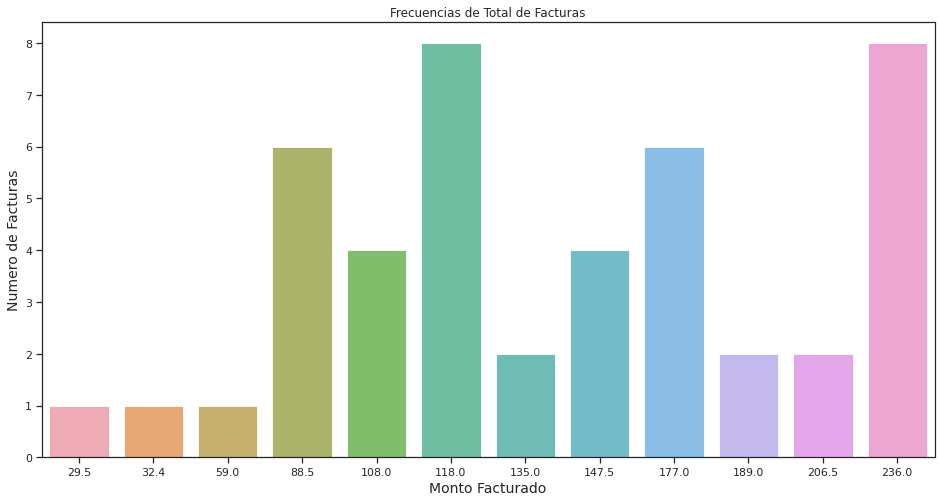

In [7]:
plt.figure(figsize=[16, 8])
sns.set(style="ticks")

sns.barplot(x=frequency_total_pagado.index, y=frequency_total_pagado.frequency, alpha=0.8);
plt.title('Frecuencias de Total de Facturas');
plt.ylabel('Numero de Facturas', fontsize=14);
plt.xlabel('Monto Facturado', fontsize=14);

**Medidas de Centralización:**

Ahora analizaremos las siguientes medidas de centralización: 
- Media aritmetica
- Mediana
- Moda

In [8]:
# Copiamos df con la variable total_pagado
total_pagado = df['total_pagado'].copy(deep='True')
df_total_pagado = pd.DataFrame(total_pagado)

In [9]:
# Calculamos la media aritmetica, utilizando la funcion mean()
mean = df_total_pagado.mean()
print(f'La media aritmetica de la variable total_pagado es: {mean[0]}')

La media aritmetica de la variable total_pagado es: 147.30888888888887


In [10]:
# Calculamos la mediana, utilizando la funcion median()
median = df_total_pagado.median()
print(f'La mediana de la variable total_pagado es: {median[0]}')


La mediana de la variable total_pagado es: 135.0


In [11]:
# Calculamos la moda, utilizando la funcion mode()
mode = df_total_pagado.mode()
print(f'La moda de la variable: {mode}')

La moda de la variable:    total_pagado
0         118.0
1         236.0


En el caso de la moda de la variable total_pagado, me entrega dos valores, por lo que se considera como una **bimodal**, lo cual se puede comprobar en la tabla de frecuencia, el cual nos indica que estos dos valores se repiten en 8 ocasiones en nuestro dataset.

Otra conclusión que podemos obtener de las medidas de centralización, es que no se cumple la condición de simetria, ya que la media es distinta a la media y a la moda.


**Medidas de dispersión:**

Se analizarán las siguientes medidas: 
- rango
- varianza
- desviación típica 
- coeficiente de variación.

In [12]:
# Calcularemos el Rango de la variable total_pagado

rango = max(df_total_pagado.total_pagado) - min(df_total_pagado.total_pagado)
print(f"El Rango de la variable total_pagado es: {rango}")

El Rango de la variable total_pagado es: 206.5


In [13]:
# Calcularemos la varianza de la variable total_pagado
var = round(df_total_pagado["total_pagado"].var(),3)
print(f"La varianza de la variable total_pagado es: {var}")

La varianza de la variable total_pagado es: 3356.594


In [36]:
# Calcularemos la desviación típica de la variable total_pagado
std = round(df_total_pagado["total_pagado"].std(ddof=1),3)
print(f"La varianza de la variable total_pagado es: {std}")

La varianza de la variable total_pagado es: 57.936


In [15]:
# Calcularemos el coeficiente de variación de la variable total_pagado
cv = round(std / mean[0] * 100, 3)

print(f"El coeficiente de variación de la variable total_pagado es: {cv}%")

El coeficiente de variación de la variable total_pagado es: 39.33%


 **Medidas de posición**

Se calcularan las siguientes medidas de posición para la variable total_pagado:

- rango intercuartílico
- cuartil primero
- decil 3. 
- ¿Cuál es la factura que tiene como mínimo el 10% del total pagado de las facturas?

In [16]:
# calculamos el rango intercuartílico para la variable total_pagado
iqr = df_total_pagado["total_pagado"].quantile(0.75) - df_total_pagado["total_pagado"].quantile(0.25)
print(f"El rango intercuartílico para la variable total_pagado es: {iqr}")

El rango intercuartílico para la variable total_pagado es: 81.0


In [17]:
# calculamos el primer cuartil para la variable total_pagado
q1 = df_total_pagado["total_pagado"].quantile(0.25)
print(f"El primer cuartil para la variable total_pagado es: {q1}")

El primer cuartil para la variable total_pagado es: 108.0


In [18]:
# calculamos el tercer decil para la variable total_pagado
d3 = df_total_pagado["total_pagado"].quantile(0.3)
print(f"El tercer decil para la variable total_pagado es: {d3}")

El tercer decil para la variable total_pagado es: 118.0


In [19]:
# ¿Cuál es la factura que tiene como mínimo el 10% del total pagado de las facturas?

p90 = df_total_pagado["total_pagado"].quantile(0.9)
print(f"El valor mínimo es: {p90}")

El valor mínimo es: 236.0


In [20]:
df.loc[df['total_pagado'] >= p90]

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
3,4,04/01/2010,Enero,clienteD,si,200,normal,18,36.0,236.0
7,8,08/01/2010,Enero,clienteD,no,200,normal,18,36.0,236.0
12,13,13/01/2010,Enero,clienteA,si,200,normal,18,36.0,236.0
19,20,20/01/2010,Enero,clienteD,si,200,normal,18,36.0,236.0
24,25,25/01/2010,Enero,clienteD,si,200,normal,18,36.0,236.0
28,29,29/01/2010,Enero,clienteD,no,200,normal,18,36.0,236.0
33,34,03/02/2010,Febrero,clienteA,si,200,normal,18,36.0,236.0
40,41,10/02/2010,Febrero,clienteD,si,200,normal,18,36.0,236.0


**Medidas de concentración y forma:**

Determinaremos la curtosis, asimetría y un gráfico de la variable total_pagado.

In [25]:
# Calcularemos la Curtosis mediante la funcion kurtosis()

curtosis = df_total_pagado['total_pagado'].kurtosis(skipna = True)
print(f"La curtosis de la variable total_pagado es: {curtosis}")

La curtosis de la variable total_pagado es: -0.7990963830478419


In [29]:
# Calcularemos la asimetria mediante la funcion skew()
asimetria = df_total_pagado['total_pagado'].skew()
print(f"El coeficiente de asimetria de Fisher de la variable total_pagado es: {asimetria}")

El coeficiente de asimetria de Fisher de la variable total_pagado es: 0.09644182245694456


Con ambas medidas se puede determinar que la distribución de la variable total_pagado es **Asimetrica positiva** (coeficiente positivo o  𝐶𝐴𝐹>0 ),  lo cual indica que la cola derecha es más larga que la izquierda. Dicho de otro modo, en la cola derecha encontramos valores más alejados de la media que en la cola izquierda.

Con respecto a la curtosis es del tipo **Platicúrtica** (menos concentración en los valores centrales de la variable o  𝐶𝑢𝑟𝑡𝑜𝑠𝑖𝑠<0).

Tras analizar ambos coeficientes vemos que la serie no se ajusta totalmente a la normalidad.

Veamos el histograma de la variable total_pagado:

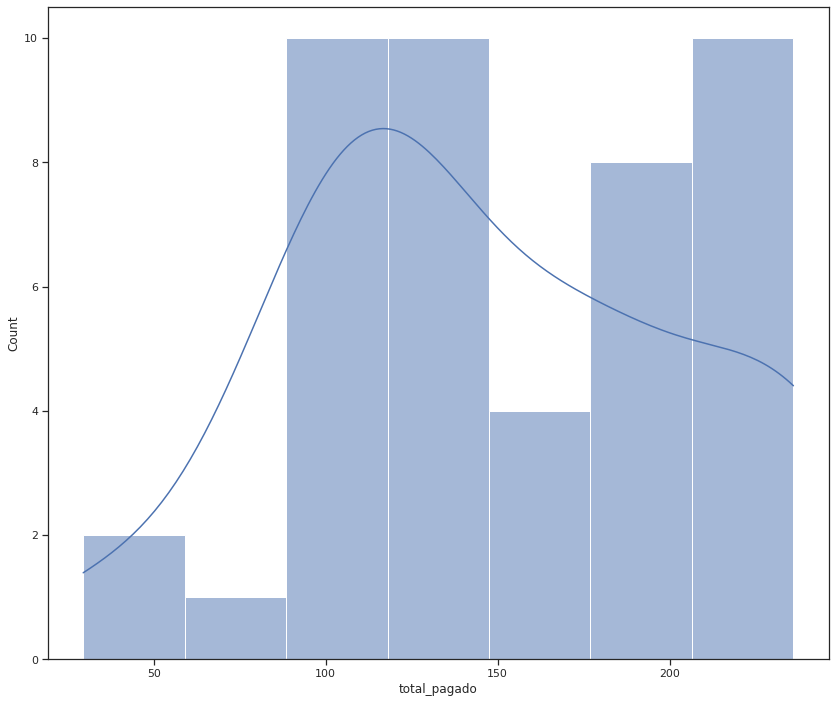

In [234]:
sns.set_theme(style="ticks")
ax = plt.subplots(figsize=(14, 12))
sns.histplot(data=df_total_pagado, x="total_pagado", kde=True, palette="vlag", stat="count", bins=7)


**Análisis rápido con box-plot y sus medidas.**

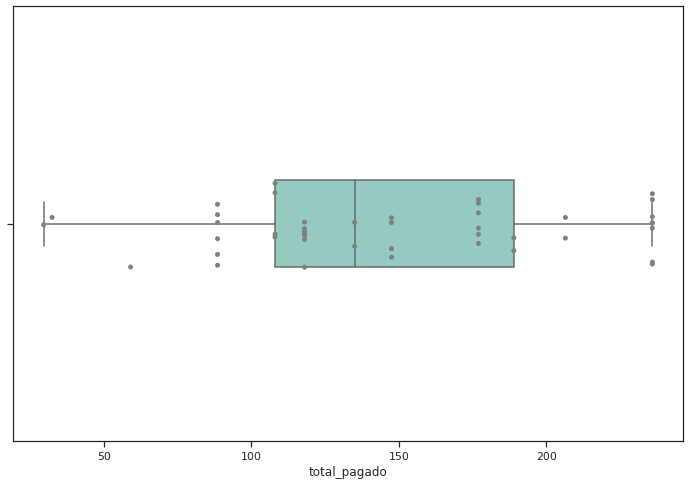

In [78]:
sns.set_theme(style="ticks")
ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x=df_total_pagado["total_pagado"], palette="Set3", width=.2, whis=[0, 100])
sns.stripplot(x="total_pagado", data=df_total_pagado, size=5, color=".5", linewidth=0)
plt.show()

**Analiza los resultados e informa de quién es el cliente que ha pagado más en todas las facturas.**

In [113]:
total_factura_clientes = df.groupby('cliente')["total_pagado"].sum()

In [114]:
total_factura_clientes


cliente
clienteA    2099.0
clienteB    1337.0
clienteC    1154.5
clienteD    2038.4
Name: total_pagado, dtype: float64

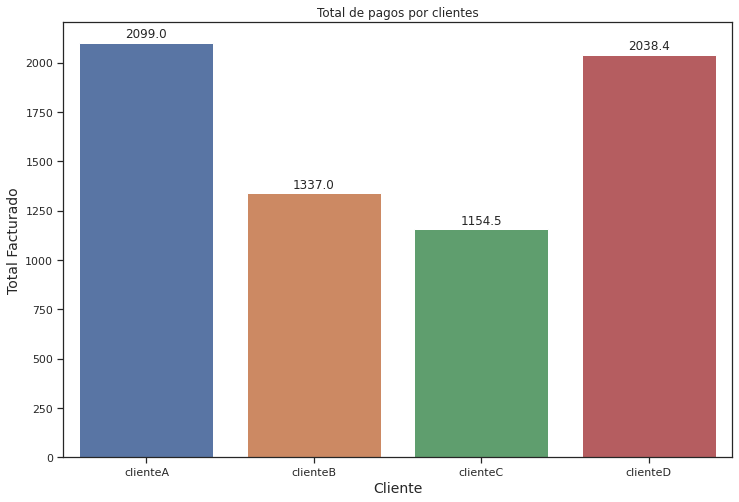

In [115]:
plt.figure(figsize=(12, 8))
bplot = sns.barplot(x=df.cliente.unique(),y=total_factura_clientes)
for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Total de pagos por clientes');
plt.ylabel('Total Facturado', fontsize=14);
plt.xlabel('Cliente', fontsize=14);



**¿Quién es el cliente que más facturas no ha pagado en el mes de febrero?**

In [151]:
total_facturas_febrero = df[(df['mes'] == 'Febrero') & (df['factura_pagada']=='no')].groupby(['cliente'])['total_pagado'].agg(['count', 'sum'])

In [152]:
total_facturas_febrero

,count,sum
cliente,,
clienteA,1,135.0
clienteB,1,59.0
clienteC,2,285.0
clienteD,1,32.4


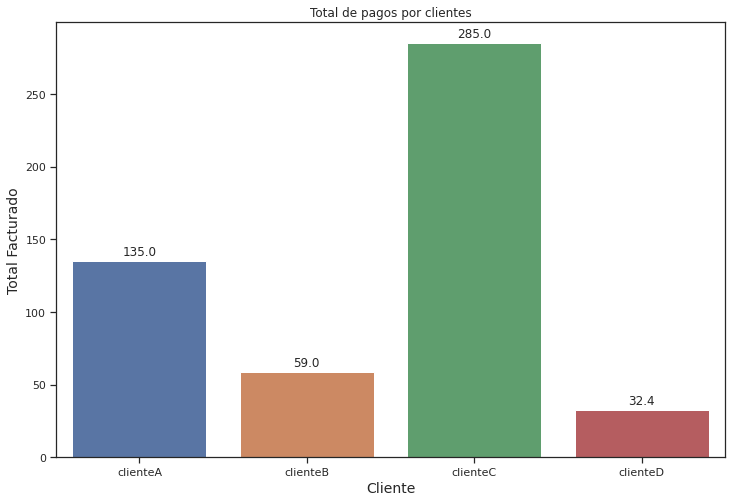

In [156]:
plt.figure(figsize=(12, 8))
bplot = sns.barplot(x=df.cliente.unique(),y='sum', data=total_facturas_febrero)
for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Total de pagos por clientes');
plt.ylabel('Total Facturado', fontsize=14);
plt.xlabel('Cliente', fontsize=14);

In [163]:
facturas_cliente_c = df[(((df['cliente']== 'clienteC') & (df['mes'] == 'Febrero')) & (df['factura_pagada']=='no'))]

In [164]:
facturas_cliente_c

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
31,32,01/02/2010,Febrero,clienteC,no,150,normal,18,27.0,177.0
35,36,05/02/2010,Febrero,clienteC,no,100,reducido,8,8.0,108.0


**Crea un gráfico que represente el total pagado de las facturas respecto del IVA aplicado.**

Analisis variable IVA

In [227]:
frequency_valores = df.groupby(["total_pagado","IVA","tipo_IVA"]).agg(frequency=("total_pagado", "count")).reset_index()
frequency_valores

,total_pagado,IVA,tipo_IVA,frequency
0,29.5,4.5,normal,1
1,32.4,2.4,reducido,1
2,59.0,9.0,normal,1
3,88.5,13.5,normal,6
4,108.0,8.0,reducido,4
5,118.0,18.0,normal,8
6,135.0,10.0,reducido,2
7,147.5,22.5,normal,4
8,177.0,27.0,normal,6
9,189.0,14.0,reducido,2


<Figure size 1152x576 with 0 Axes>

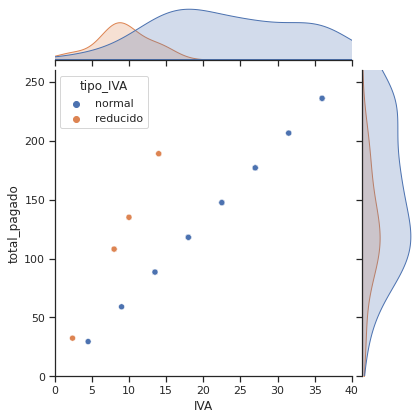

In [233]:
plt.figure(figsize=(16, 8))
jplot = sns.jointplot(data=df, x="IVA", y="total_pagado", hue="tipo_IVA", palette="deep",
              xlim=(0, 40), ylim=(0, 260))

plot.show()

Covarianza de ambas variables

Determinaremos la covarianza de las variables IVA y total_pagado.

In [184]:
cov_iva = df[['IVA']].cov()
cov_iva

,IVA
IVA,100.529919


In [185]:
cov_total_pagado = df[['total_pagado']].cov()
cov_total_pagado

,total_pagado
total_pagado,3356.593556
